In [2]:
#Librerías necesarias
import cv2
from matplotlib import pyplot as plt
import math
import numpy as np


In [3]:
def filtroErosionesDilataciones(img,n_erosiones,n_dilataciones):
        ''' 
        img: Imagen en RGB
        n_erosiones: Número de erosiones
        n_dilataciones: Número de dilataciones

        '''
        elemento_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
        kernel=elemento_rectangular
        
        opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel, iterations = 1)
        closing= cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 1)

        
        
        img_erosion= cv2.erode(closing,kernel,iterations = n_erosiones)

        img_erosion_dilatacion=cv2.dilate(img_erosion,kernel,\
        iterations = n_dilataciones)

        return img_erosion_dilatacion

def filtroApertura(img,n_aperturas):
    ''' 
    img: Imagen en RGB
    n_aperturas: Número de Aperturas
    '''
    elemento_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    kernel=elemento_rectangular
    
    opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel, iterations = 1)
    closing= cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 1)

    opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel, iterations = n_aperturas)
    return opening

def filtroCierre(img,n_cierres):
    ''' 
    img: Imagen en RGB
    n_cierres: Número de Cierres
    '''
    elemento_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    kernel=elemento_rectangular
    
    opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel, iterations = 1)
    closing= cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 1)

    closing = cv2.morphologyEx(closing,cv2.MORPH_CLOSE,kernel, iterations = n_cierres)
    return closing

def filtradoEnColor(image_blur):
    # Rango de color para eliminar el verde
    light_green = (40, 40, 40)
    dark_green = (70, 255, 255)

    # Rango de color para eliminar la luz [rrr2]

    light_white = (0, 0, 231)
    dark_white = (180, 18, 255)

    # Filtrado en verde
    # conversion a HSV (matiz, saturación, valor)
    image_blur_HSV= cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(image_blur_HSV, light_green, dark_green)
    result = cv2.bitwise_and(image_blur, image_blur, mask=mask)
    resultadoSinVerde=cv2.subtract(image_blur,result)

    # Filtrado en blanco
    mask = cv2.inRange(image_blur_HSV, light_white, dark_white)
    result = cv2.bitwise_and(image_blur, image_blur, mask=mask)
    resultadoSinBlanco=cv2.subtract(resultadoSinVerde,result)

    return resultadoSinBlanco

def myThreshold(img_rbg):
    # Conversión a escala de grises
    gray=cv2.cvtColor(img_rbg, cv2.COLOR_RGB2GRAY) 

    # Umbralización 'adaptativa' con THRESH_OTSU
    # img_thr_THRESH_OTSU= cv2.threshold(img_gray_blur[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    # Umbralización con threshold
    
    return cv2.threshold(gray,3,255,0)[1] 

def unosDentroMascara(mask,cnt):
    # https://stackoverflow.com/questions/50670326/how-to-check-if-point-is-placed-inside-contour
    # https://docs.opencv.org/4.5.5/dc/d48/tutorial_point_polygon_test.html
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            dist = cv2.pointPolygonTest(cnt,(j,i),False)
            if dist>=0:
                mask[i,j]=1

    return mask


def posMax(Vector):
    ''' 
    Calcula la posición del máximo componete del Vector
    Vector: nx1 vector para hallar el máximo
    '''
    return np.where(Vector == np.amax(Vector))[0][0]


def preprocesamientoAndSegmentacion(ruta,n_imag_monilia,n_imag_fito,n_imag_healty,n_aperturas):

    # Importacion de imagenes

    # path
    #ruta='../../figs/imgsReto/'
    #ruta='../../figs/baseDatos/'

    # Pixeles del mínimo entre el ancho y el alto
    minSize=256


    # Importación de monilia
    #n_imag_monilia=2
    imag_monilia=[]

    for i in range(n_imag_monilia):
        imag_aux = cv2.imread(f'{ruta}Monilia/Monilia{i+1}.jpg')
        imag_aux=cv2.cvtColor(imag_aux,cv2.COLOR_BGR2RGB)
        
        n=imag_aux.shape[0]
        m=imag_aux.shape[1]

        escala= minSize/min(n,m)
        imag_aux= cv2.resize(imag_aux, None, fx=escala, fy= escala,\
                                    interpolation= cv2.INTER_LINEAR)

        imag_monilia.append(imag_aux)


    # Importacion de Phytophthora 

    #n_imag_fito=2
    imag_fito=[]

    for i in range(n_imag_fito):
        imag_aux = cv2.imread(f'{ruta}Fito/Fito{i+1}.jpg')
        imag_aux=cv2.cvtColor(imag_aux,cv2.COLOR_BGR2RGB)
        
        n=imag_aux.shape[0]
        m=imag_aux.shape[1]

        escala= minSize/min(n,m)
        imag_aux= cv2.resize(imag_aux, None, fx=escala, fy= escala,\
                                    interpolation= cv2.INTER_LINEAR)


        imag_fito.append(imag_aux)
        

    # Importación de cacao saludable

    #n_imag_healty=2
    imag_healty=[]

    favory_healty=range(n_imag_healty)

    for i in favory_healty:
        imag_aux = cv2.imread(f'{ruta}Sana/Sana{i+1}.jpg')

        imag_aux=cv2.cvtColor(imag_aux,cv2.COLOR_BGR2RGB)
        
        n=imag_aux.shape[0]
        m=imag_aux.shape[1]

        escala= minSize/min(n,m)
        imag_aux= cv2.resize(imag_aux, None, fx=escala, fy= escala,\
                                    interpolation= cv2.INTER_LINEAR)

        imag_healty.append(imag_aux)
        
    ## Se unen todas las imágenes y se haca un redimensionamiento
    imagenes = imag_fito+imag_monilia+imag_healty



    # for i in range(0,len(imagenes),3):
    #     plt.figure(figsize=(15, 15))
    #     print(imagenes[i].shape)
    #     plt.subplot(1,3,1),plt.imshow(imagenes[i])
    #     plt.xticks([]),plt.yticks([])

    #     plt.subplot(1,3,2),plt.imshow(imagenes[i+1])
    #     plt.xticks([]),plt.yticks([])

    #     plt.subplot(1,3,3),plt.imshow(imagenes[i+2])
    #     plt.xticks([]),plt.yticks([])

    #     plt.show()

    ## Preprocesamiento
    
    image_blur = []
    image_colorFilter= []
    image_grayFilter= []
    image_filter=[]



    for i in range(len(imagenes)):
        # Filtro GaussianBlur
        image_blur.append(cv2.GaussianBlur(imagenes[i],(5,5),0))
        

        image_colorFilter.append(filtradoEnColor(image_blur[i]))
        # n_erosiones=math.ceil(math.log(closing.shape[0]*closing.shape[1]))
        # n_erosiones=7
        # n_dilataciones=7
        # n_cierres=15
    

        
        #image_filter.append(filtroErosionesDilataciones(image_colorFilter[i],\
        #    n_erosiones,n_dilataciones))
        

        image_grayFilter.append(cv2.cvtColor(image_colorFilter[i], cv2.COLOR_RGB2GRAY))

        image_filter.append(filtroApertura(image_grayFilter[i],n_aperturas))
        #image_filter.append(filtroCierre(image_colorFilter[i],n_cierres))




    # for i in range(len(imagenes)):
    #     plt.figure(figsize=(30,60))
    #     plt.subplot(1,3,1),plt.imshow(imagenes[i])
    #     plt.title('Imagen original'),plt.xticks([]),plt.yticks([])

    #     plt.subplot(1,3,2),plt.imshow(image_grayFilter[i],cmap = 'gray')
    #     plt.title('Imagen filtrada color-gris'),plt.xticks([]),plt.yticks([])

    #     plt.subplot(1,3,3),plt.imshow(image_filter[i],cmap = 'gray')
    #     plt.title('Imagen filtrado morfológico'),plt.xticks([]),plt.yticks([])
    #     plt.show()

    # Contornos y áreas




    lisContours=[]
    image_minAreaRect=[] # Array en el que sobreescribe el contorno
    image_umbralizada=[]
    #image_mascaras=[]
    image_segmentada=[]

    for i in range(len(imagenes)):

        #image_umbralizada.append(myThreshold(image_filter[i]))
        #image_umbralizada.append(cv2.threshold(image_filter[i],3,255,0)[1])
        image_umbralizada.append(cv2.threshold(image_filter[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1])
        lisContours.append(cv2.findContours(\
                image_umbralizada[i],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0])
        # https://docs.opencv.org/4.5.5/dd/d49/tutorial_py_contour_features.html
        # https://docs.opencv.org/4.5.5/d6/d6e/group__imgproc__draw.html#ga57be400d8eff22fb946ae90c8e7441f9

        
        
        areas=np.array([],float)
        
        for contorno in lisContours[i]:        
            areas=np.append(areas,cv2.contourArea(contorno))

        ## Se elige la máxima área
    
        try:
            posicionMaximaArea=posMax(areas)

            image_minAreaRect.append(imagenes[i].copy())


            rect = cv2.minAreaRect(lisContours[i][posicionMaximaArea])
            box = cv2.boxPoints(rect)
            box = np.int0(box)


            cv2.drawContours(image_minAreaRect[i], contours=[box],\
            contourIdx=-1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

            
            ellipse = cv2.fitEllipse(lisContours[i][posicionMaximaArea])
            cv2.ellipse(img=image_minAreaRect[i],box=ellipse,color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
            
            #https://itecnote.com/tecnote/python-get-mask-from-contour-with-opencv/
            
            # Se realiza la máscara
            n=image_minAreaRect[i].shape[0]
            m=image_minAreaRect[i].shape[1]
            # image_mascaras.append(np.zeros((n,m), np.uint8))
            # image_mascaras[i]=unosDentroMascara(image_mascaras[i],box)

            mask=np.zeros((n,m), np.uint8)
            mask=unosDentroMascara(mask,box)


            #cv2.ellipse(img=image_mascaras[i],box=ellipse,color=(255), thickness=2, lineType=cv2.LINE_AA)
            
            # cv2.drawContours(image_minAreaRect[i], contours=[box],\
            # contourIdx=0, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

            # Se discrimina el área de interés
            auxImagenSegmentada=cv2.bitwise_and(image_blur[i], image_blur[i], mask=mask)
            #auxImagenSegmentada=filtradoEnColor(auxImagenSegmentada)
            #auxImagenSegmentada=filtroApertura(auxImagenSegmentada,3)
            image_segmentada.append(auxImagenSegmentada) 


        except ValueError: 
            print('No se logró sacar el contorno')


    for i in range(len(image_segmentada)):
        plt.figure(figsize=(15,15))
        plt.subplot(1,5,1),plt.imshow(imagenes[i])
        plt.title('Imagen original'),plt.xticks([]),plt.yticks([])


        plt.subplot(1,5,2),plt.imshow(image_filter[i],cmap = 'gray')
        plt.title('Imagen filtrado morfológico'),plt.xticks([]),plt.yticks([])

        plt.subplot(1,5,3),plt.imshow(image_umbralizada[i],cmap = 'gray')
        plt.title('Imagenes umbralizadas'),plt.xticks([]),plt.yticks([])

        plt.subplot(1,5,4),plt.imshow(image_minAreaRect[i])
        plt.title('Imagenes con contornos'),plt.xticks([]),plt.yticks([])


        plt.subplot(1,5,5),plt.imshow(image_segmentada[i])
        plt.title('Imagen segmentada'),plt.xticks([]),plt.yticks([])
        # plt.savefig(f"resultados/fig{contador+1}.pdf", dpi=150)
        plt.show()




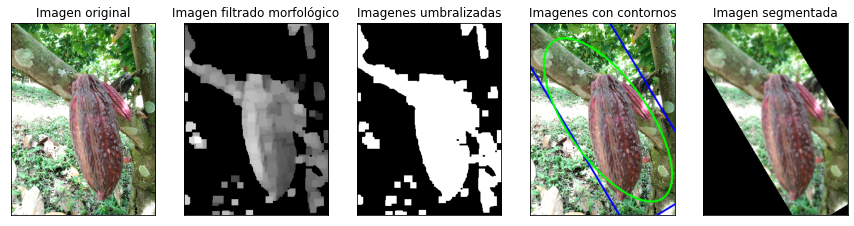

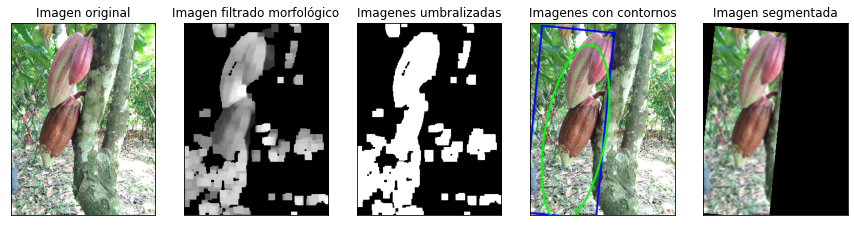

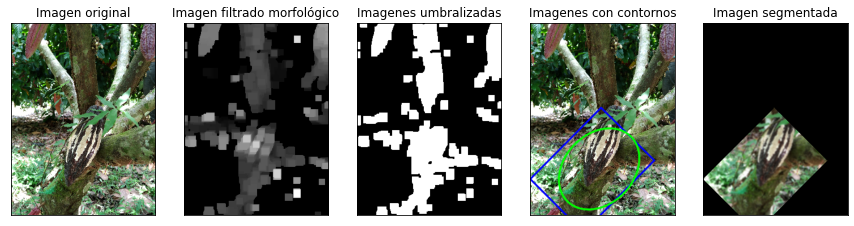

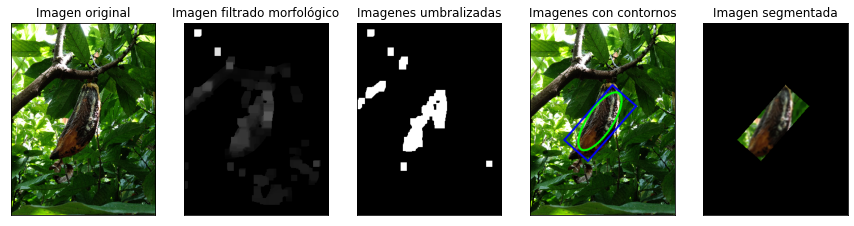

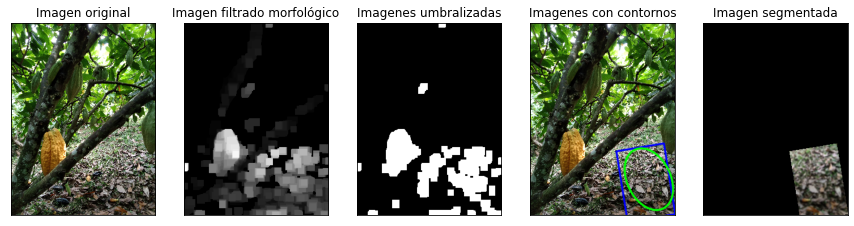

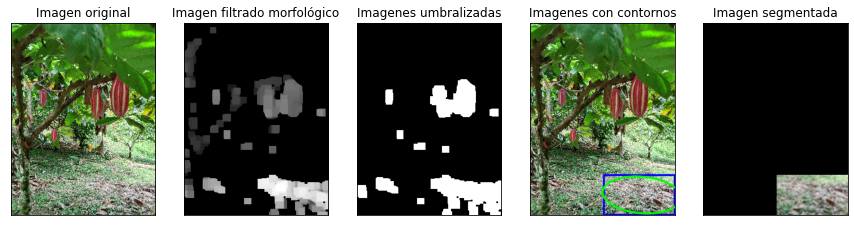

In [4]:
ruta='../../figs/imgsReto/'
n_imag_monilia=2
n_imag_fito=2
n_imag_healty=2
n_aperturas=5
preprocesamientoAndSegmentacion(ruta,n_imag_monilia,n_imag_fito,n_imag_healty,n_aperturas)

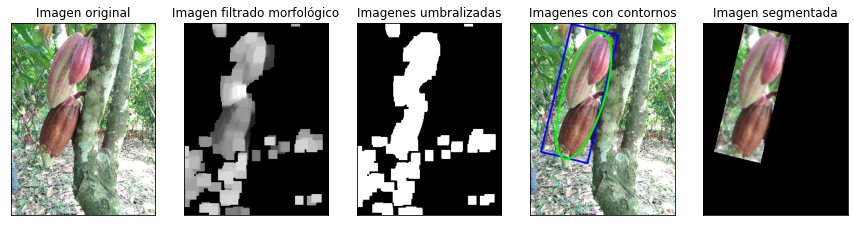

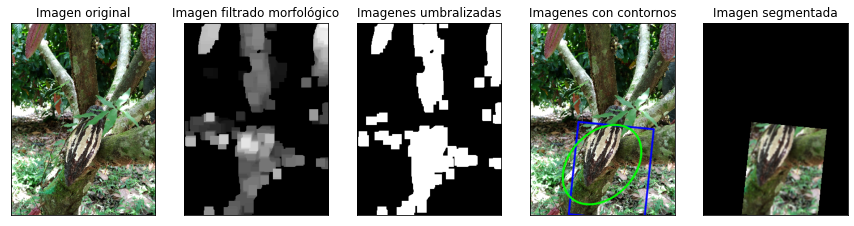

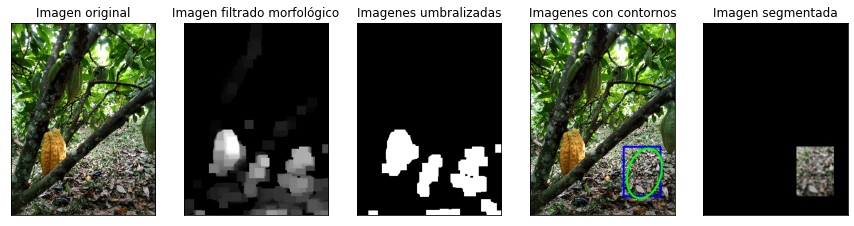

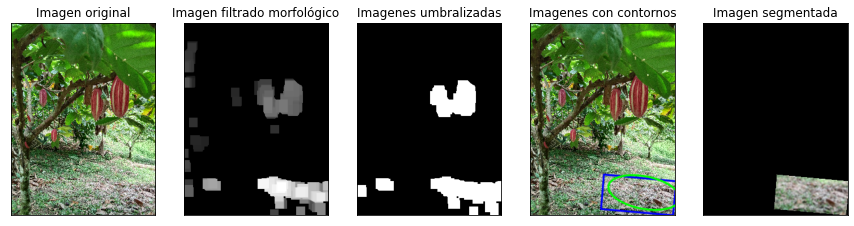

In [5]:
ruta='../../figs/imgsReto/'
n_imag_monilia=2
n_imag_fito=2
n_imag_healty=2
n_aperturas=7
preprocesamientoAndSegmentacion(ruta,n_imag_monilia,n_imag_fito,n_imag_healty,n_aperturas)

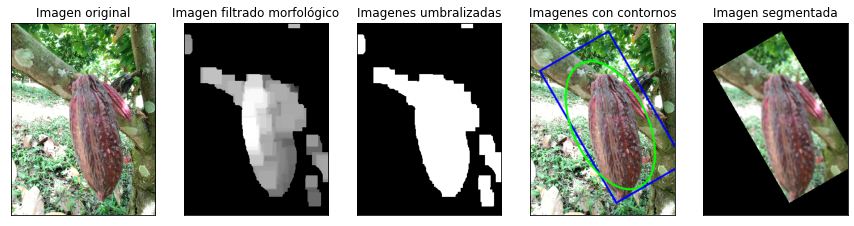

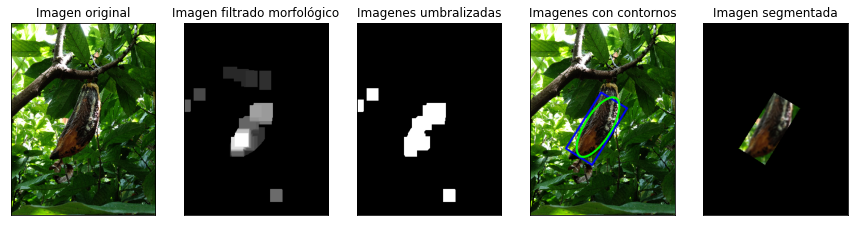

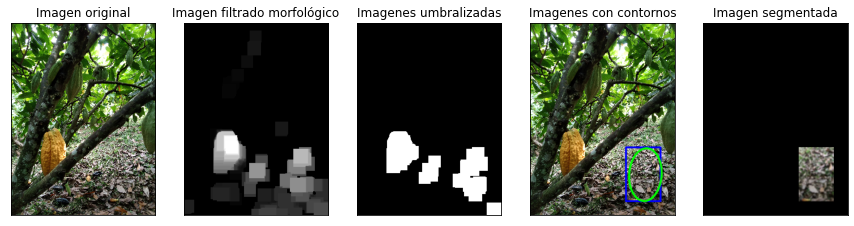

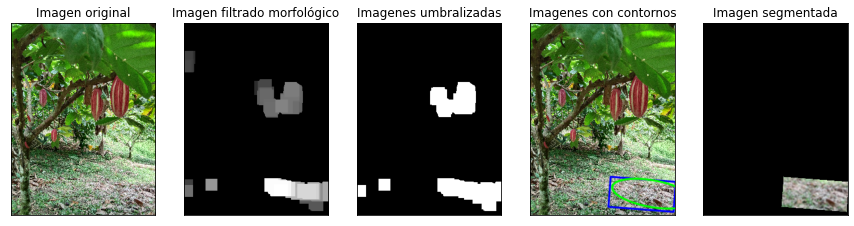

In [6]:
ruta='../../figs/imgsReto/'
n_imag_monilia=2
n_imag_fito=2
n_imag_healty=2
n_aperturas=10
preprocesamientoAndSegmentacion(ruta,n_imag_monilia,n_imag_fito,n_imag_healty,n_aperturas)

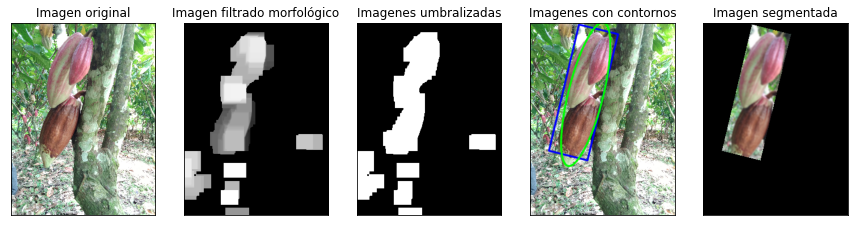

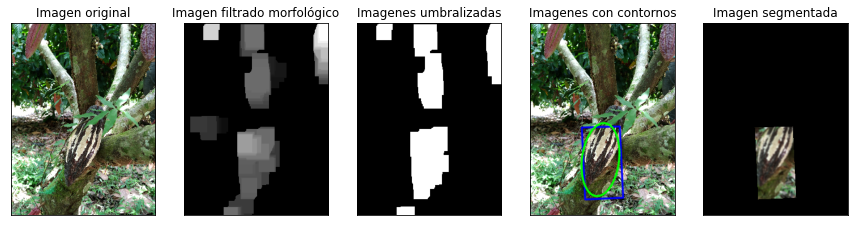

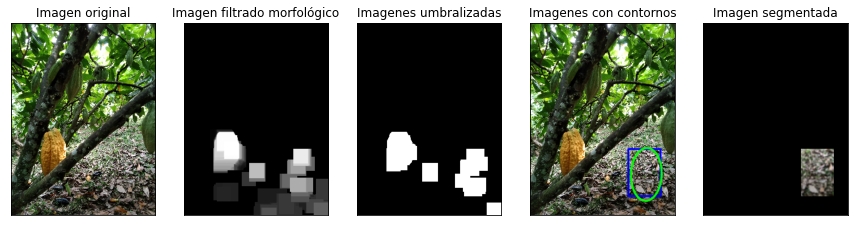

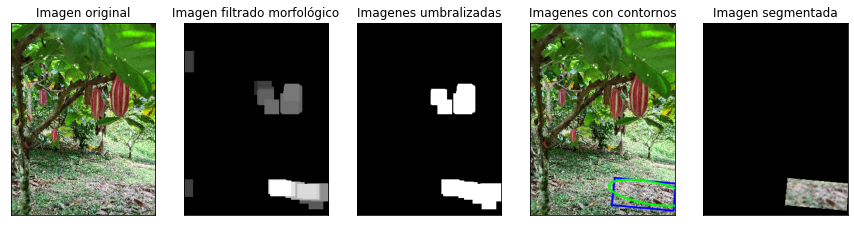

In [7]:
ruta='../../figs/imgsReto/'
n_imag_monilia=2
n_imag_fito=2
n_imag_healty=2
n_aperturas=12
preprocesamientoAndSegmentacion(ruta,n_imag_monilia,n_imag_fito,n_imag_healty,n_aperturas)

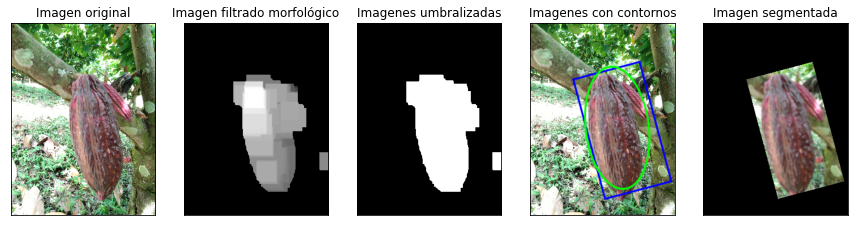

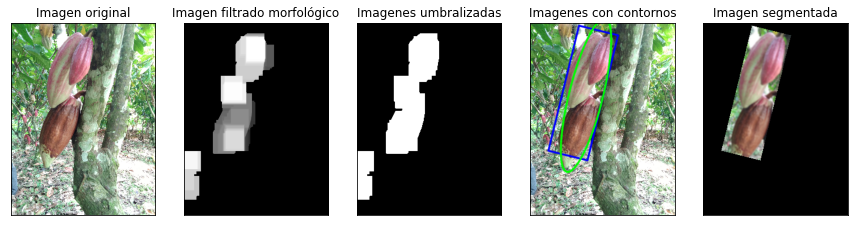

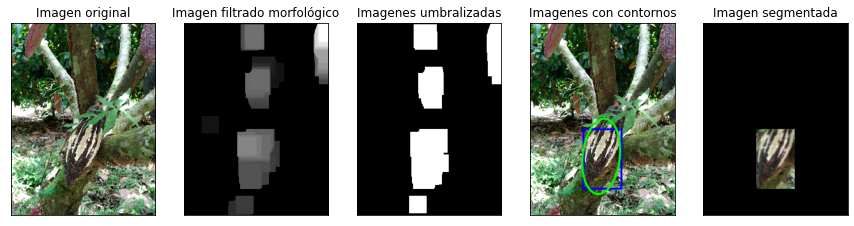

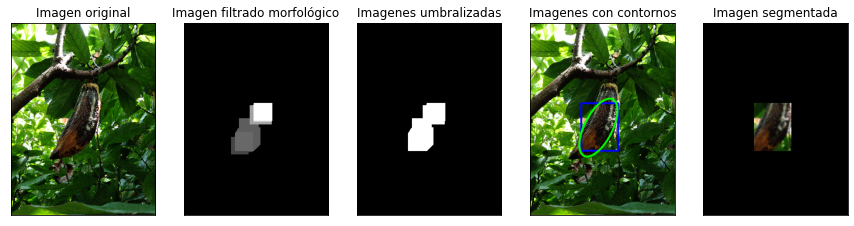

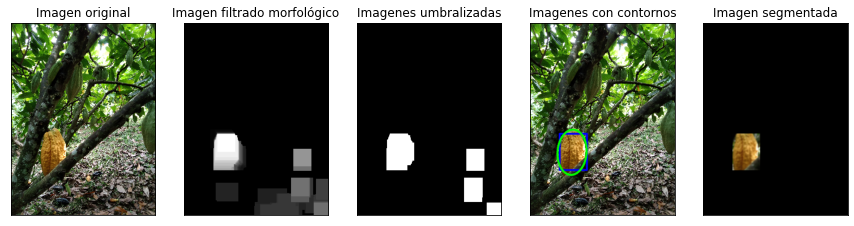

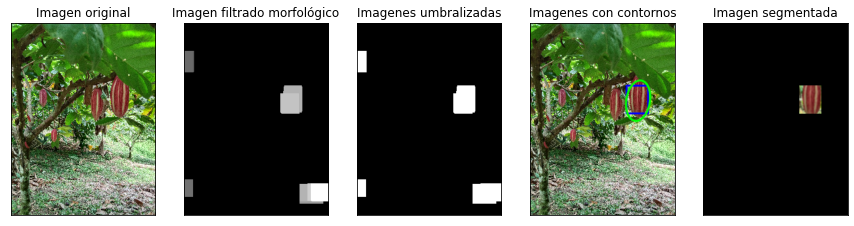

In [8]:
ruta='../../figs/imgsReto/'
n_imag_monilia=2
n_imag_fito=2
n_imag_healty=2
n_aperturas=15
preprocesamientoAndSegmentacion(ruta,n_imag_monilia,n_imag_fito,n_imag_healty,n_aperturas)

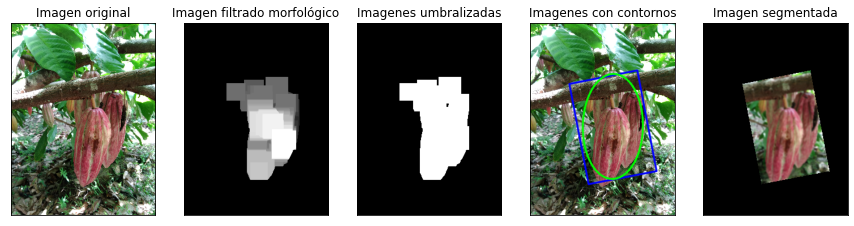

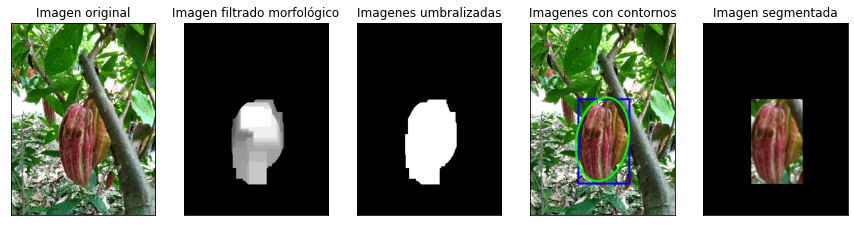

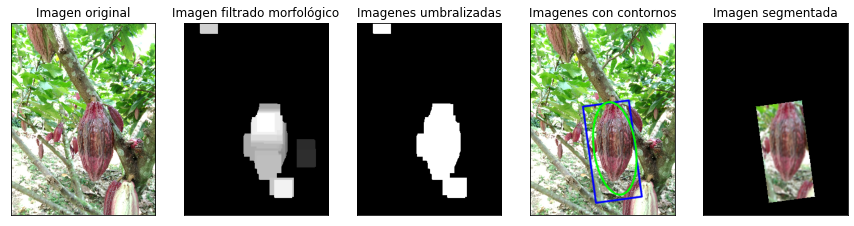

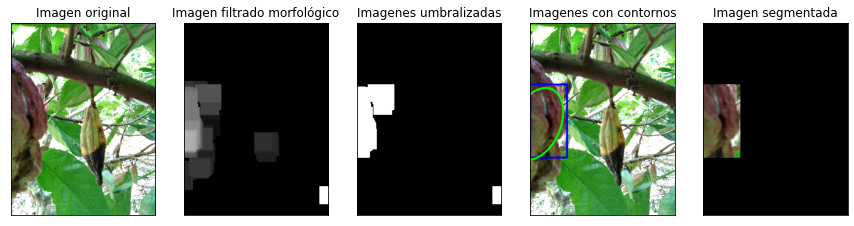

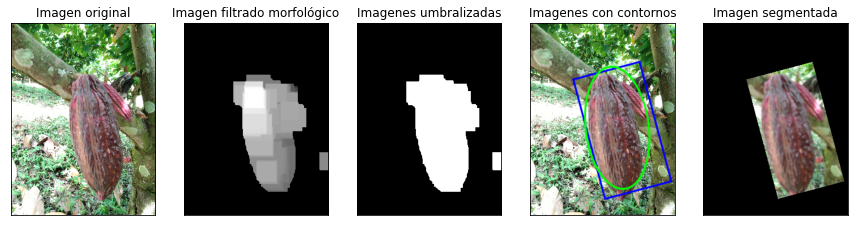

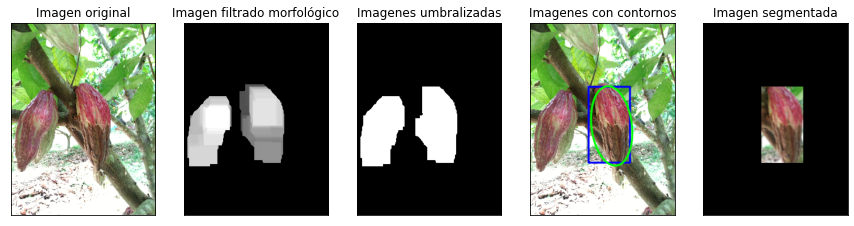

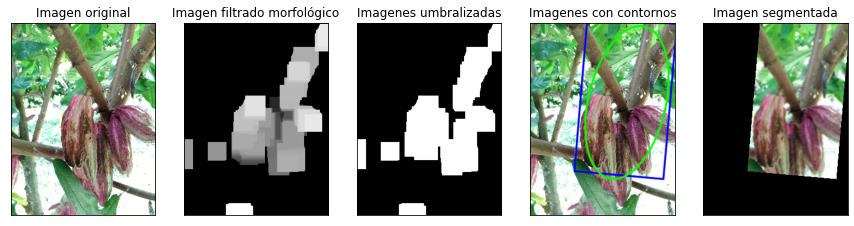

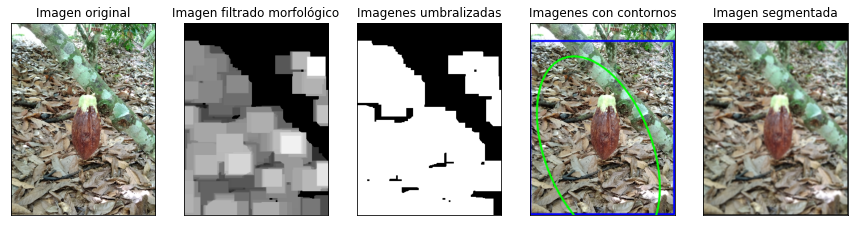

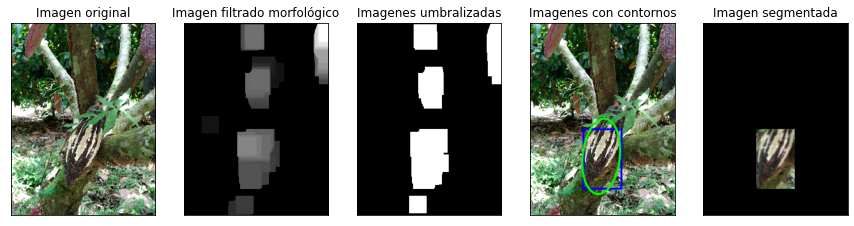

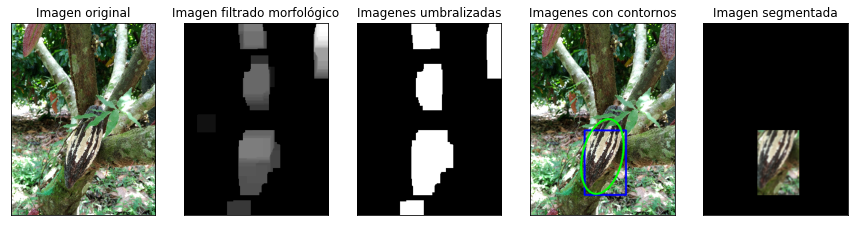

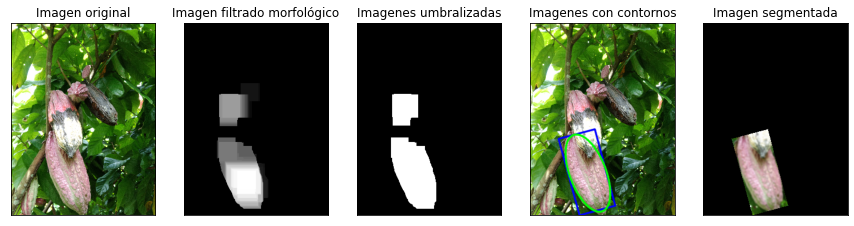

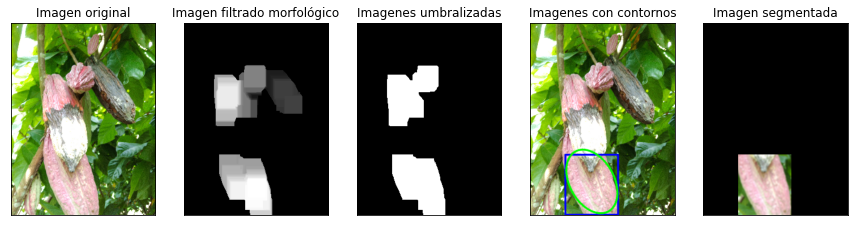

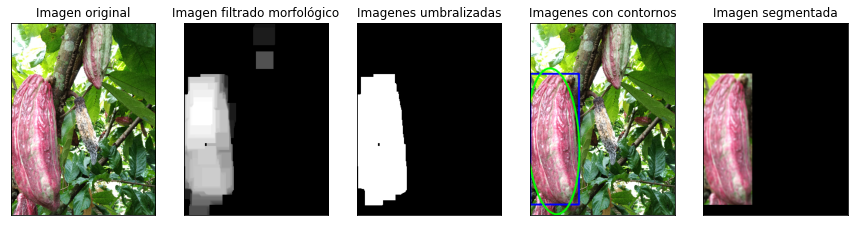

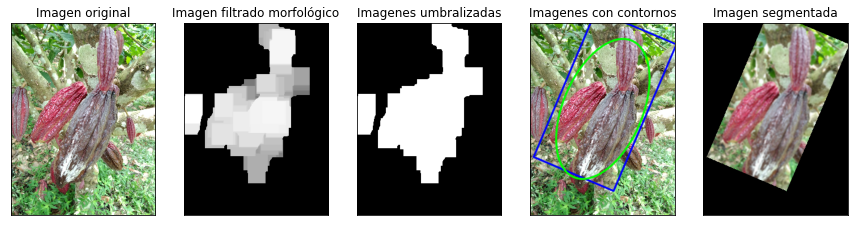

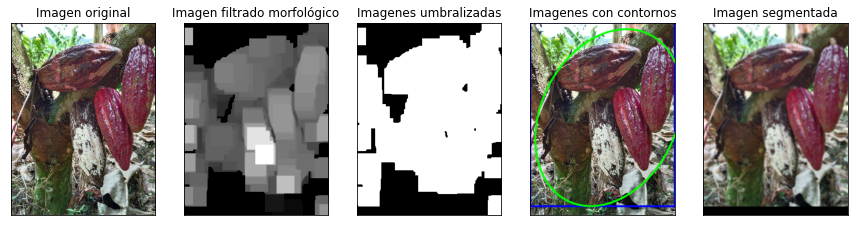

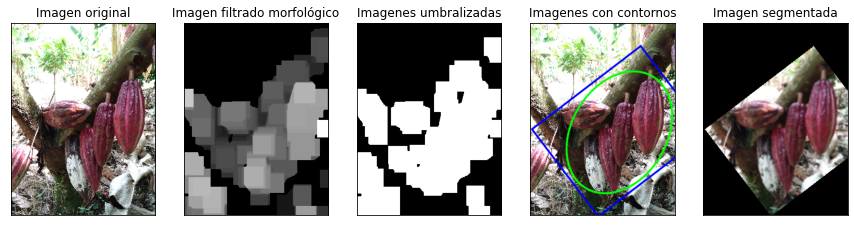

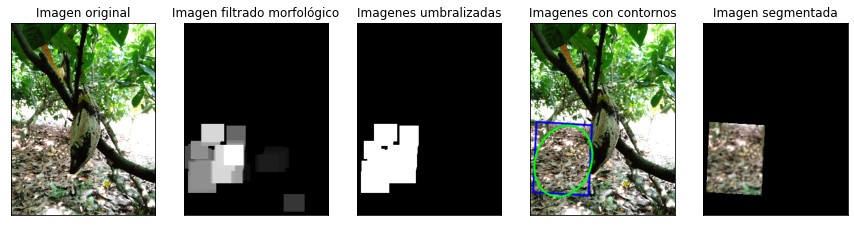

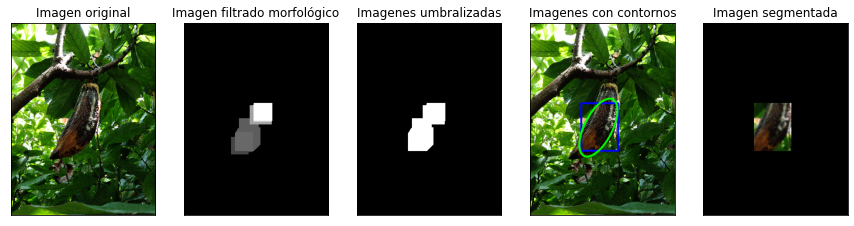

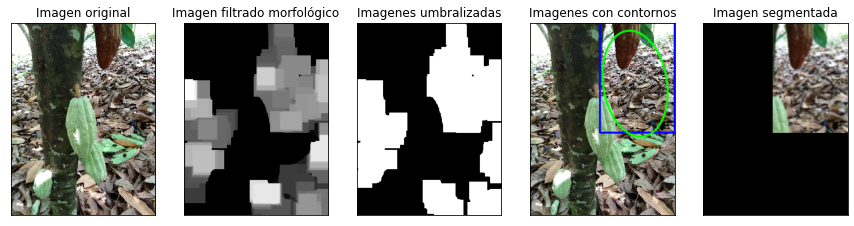

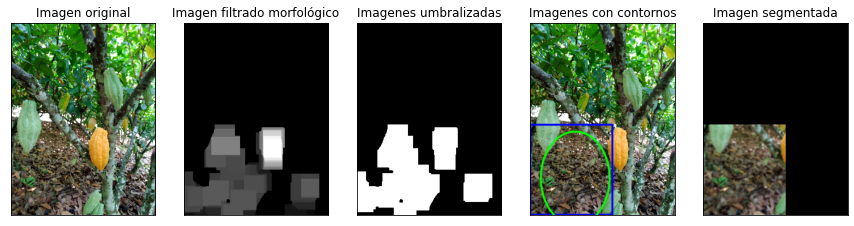

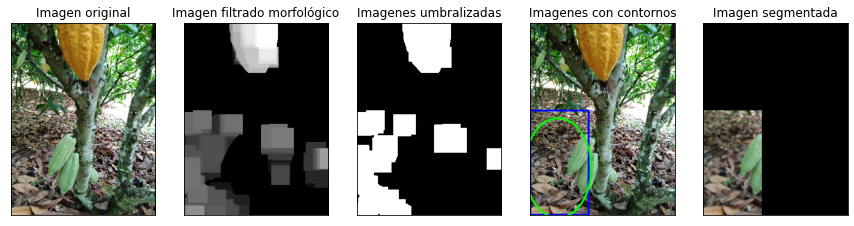

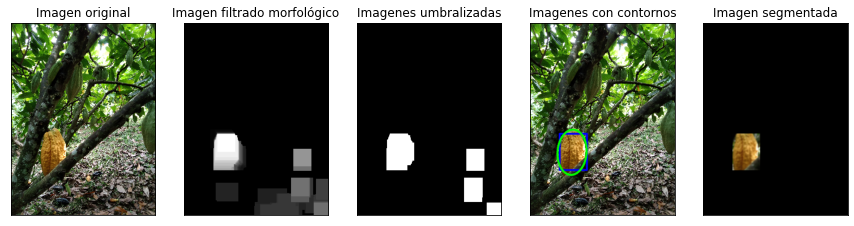

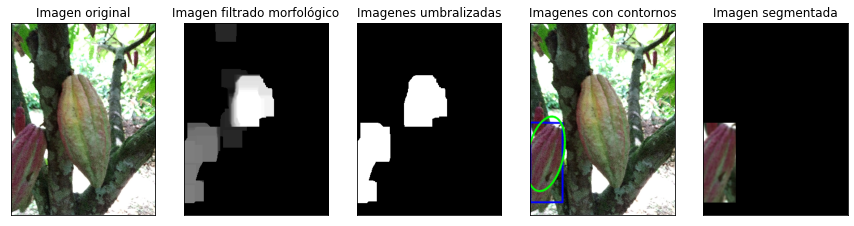

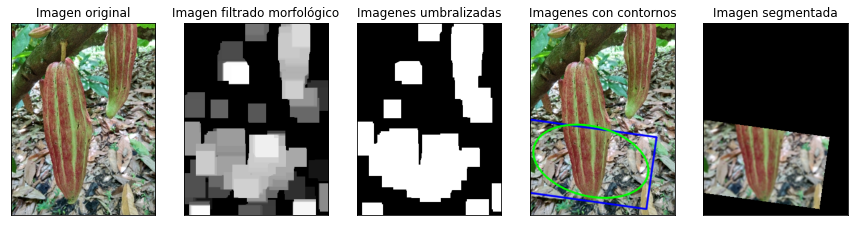

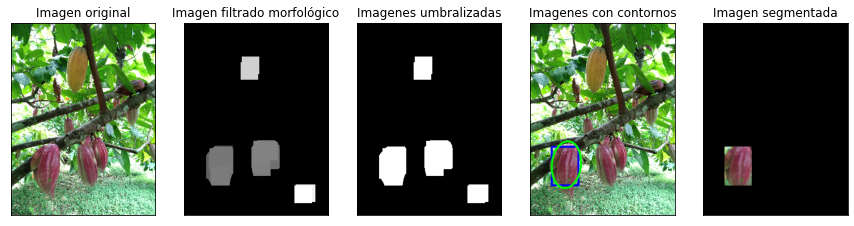

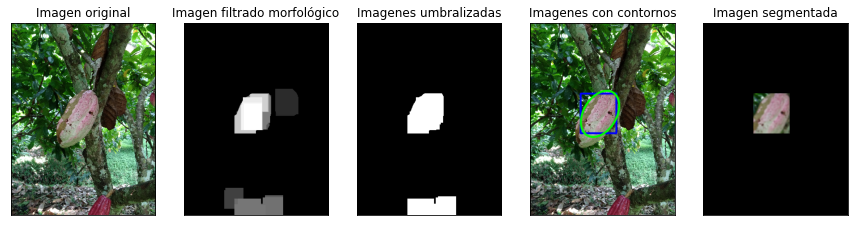

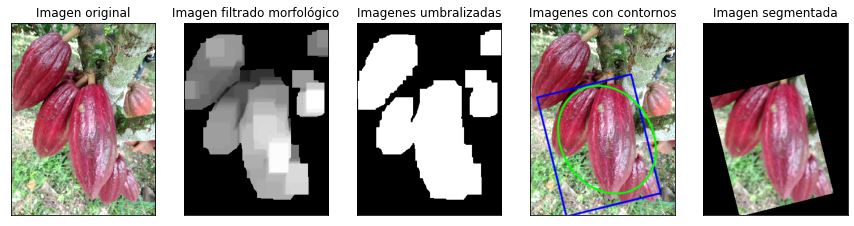

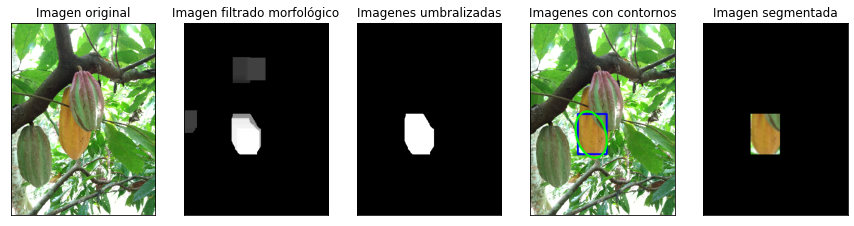

In [9]:
# Con 15 erosiones se tuvo un buen resultado
# Ahora, con el conjunto de la base de datos:

ruta='../../figs/baseDatos/'
n_imag_monilia=10
n_imag_fito=10
n_imag_healty=10
n_aperturas=15
preprocesamientoAndSegmentacion(ruta,n_imag_monilia,n_imag_fito,n_imag_healty,n_aperturas)
